In [1]:
!pip install pandas numpy matplotlib tensorflow keras sklearn &> /dev/null

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, GlobalMaxPooling2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import InceptionV3, MobileNetV3Large, ResNet50, VGG19

In [3]:
PATH_DATA = '../input/cars-data/data_remove_bg/data_remove_bg'

In [4]:
generator = ImageDataGenerator(rescale = 1./255., validation_split=0.2, width_shift_range=[1, 2, 3, 4, 5, 6, 7])

target_size = (100, 100)
batch_size = 32

train_batches = generator.flow_from_directory(
    PATH_DATA, class_mode='categorical', subset='training',
    batch_size=batch_size, target_size=target_size
)

test_batches = generator.flow_from_directory(
    PATH_DATA, class_mode='categorical', subset='validation', 
    batch_size=batch_size, target_size=target_size
)

validation_batches = generator.flow_from_directory(
    PATH_DATA, class_mode='categorical', subset='validation', 
    batch_size=batch_size, target_size=target_size
)

Found 12951 images belonging to 7 classes.
Found 3234 images belonging to 7 classes.
Found 3234 images belonging to 7 classes.


In [5]:
# preview data (batch size, width, height, colors)
print('x_train shape: ', train_batches[0][0].shape)
print('x_test shape: ', test_batches[0][0].shape)
print('y_train shape: ', train_batches[0][1].shape)
print('y_test shape: ', test_batches[0][1].shape)

x_train shape:  (32, 100, 100, 3)
x_test shape:  (32, 100, 100, 3)
y_train shape:  (32, 7)
y_test shape:  (32, 7)


In [6]:
# input shape
input_shape = train_batches[0][0][0].shape
input_shape

(100, 100, 3)

In [7]:
# output shape
output_shape = len(train_batches[0][1][0])
output_shape

7

In [8]:
model = ResNet50(
    input_shape=input_shape,
    classes=output_shape,
    weights=None,
    pooling='max',
    classifier_activation='softmax'
)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

2022-10-02 18:21:42.273758: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-02 18:21:42.401231: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-02 18:21:42.402032: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-02 18:21:42.403237: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 100, 100, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 106, 106, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 50, 50, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 50, 50, 64)   256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [9]:
# train model
r = model.fit(train_batches, validation_data=validation_batches, epochs=100)

2022-10-02 18:21:46.442496: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100


2022-10-02 18:21:52.254729: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


405/405 [==============================] - 186s 432ms/step - loss: 1.8511 - accuracy: 0.3357 - val_loss: 1.7491 - val_accuracy: 0.3210
Epoch 2/100
405/405 [==============================] - 139s 342ms/step - loss: 1.4980 - accuracy: 0.4469 - val_loss: 1.7979 - val_accuracy: 0.3850
Epoch 3/100
405/405 [==============================] - 143s 354ms/step - loss: 1.2752 - accuracy: 0.5307 - val_loss: 2.7891 - val_accuracy: 0.2359
Epoch 4/100
405/405 [==============================] - 139s 343ms/step - loss: 1.0988 - accuracy: 0.5858 - val_loss: 2.8070 - val_accuracy: 0.2938
Epoch 5/100
405/405 [==============================] - 139s 343ms/step - loss: 0.9860 - accuracy: 0.6370 - val_loss: 1.7497 - val_accuracy: 0.4242
Epoch 6/100
405/405 [==============================] - 139s 343ms/step - loss: 0.9103 - accuracy: 0.6583 - val_loss: 3.8936 - val_accuracy: 0.3024
Epoch 7/100
405/405 [==============================] - 140s 346ms/step - loss: 0.8457 - accuracy: 0.6894 - val_loss: 3.0792 - val_

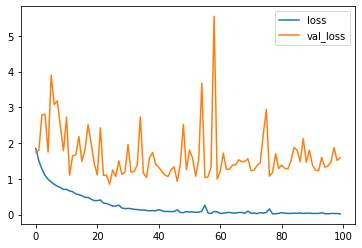

In [10]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

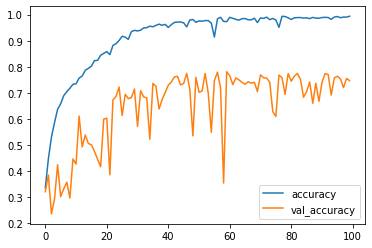

In [11]:
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()